In [2]:
import matplotlib.pyplot as plt
from scipy import signal
import sympy as sp
import numpy as np
import math
%run 'shared.ipynb'

https://dsp.stackexchange.com/a/50605

# Lowpass
- Has no zeros!
- For a odd order e.g. 3, there will be a complex pole pair, and a single real value pole
- ?? Not correct! Poles lay more towards the right side
- Exam 2011 B.1.5 - Zeros at origo, therefore LP filter

# Highpass
- Requires zeros to be in origo (and there should be zeros!)
- Has as many poles, as there are zeros (zeros = poles)
- For a odd order e.g. 3, there will be a complex pole pair, and a single real value pole

# Bandpass
- Requires zeros to be in origo (and there should be zeros!)
- Bandpass has 2x as many poles as it does zeros
- The number of zeros indicate the order of the filter

# Bandstop
- Has as many zeros as it has poles
- It will have twice the amount of poles/zeros as the order
    - Order 2 will have 4 zeros and 4 poles

# Butterworth
- Poles are on the unitcircle
    - They will try to form a circle

# Chevbyshev
- Are in a elipse (or just not in a circle really)

# FIR
- Has no poles, and if there are any poles they are located at the origo
    - Contains as many poles as there are zeros, but they are at origo so they have no meaning.
        Somtimes they are just omitted
## Stability
- A FIR filter is always stable, as the poles are located at origo

# IIR
- 
## Stability
- All poles must be within the unit circle, for it to be stable


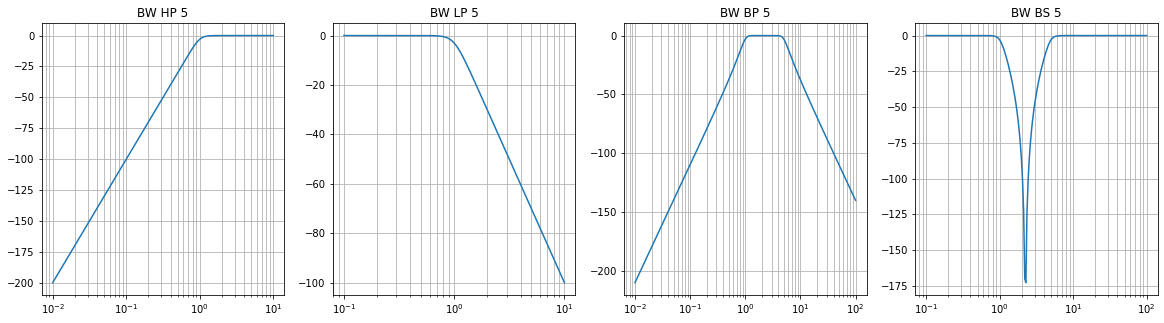

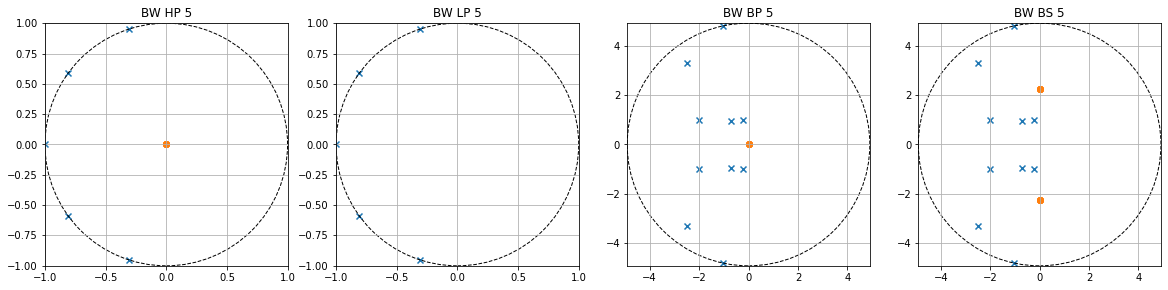

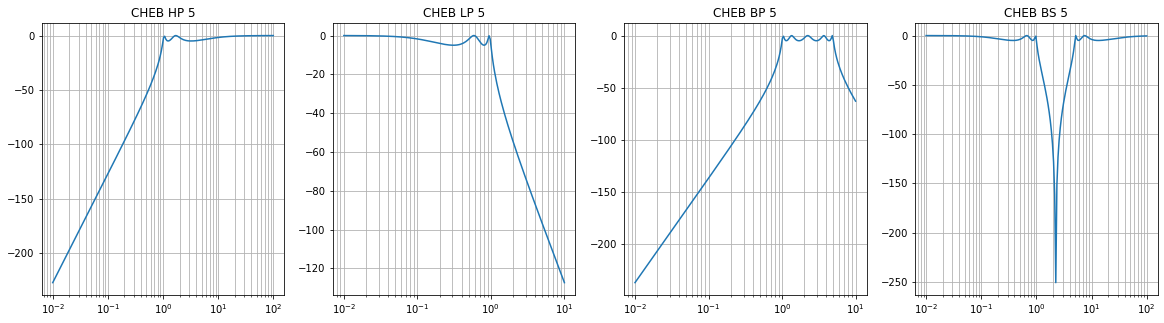

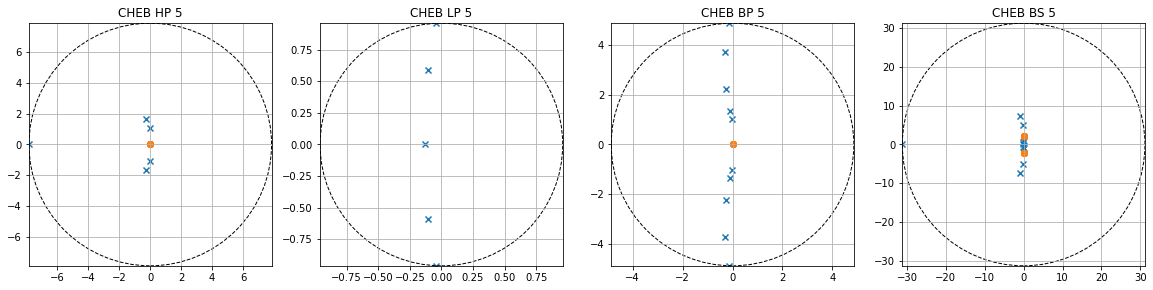

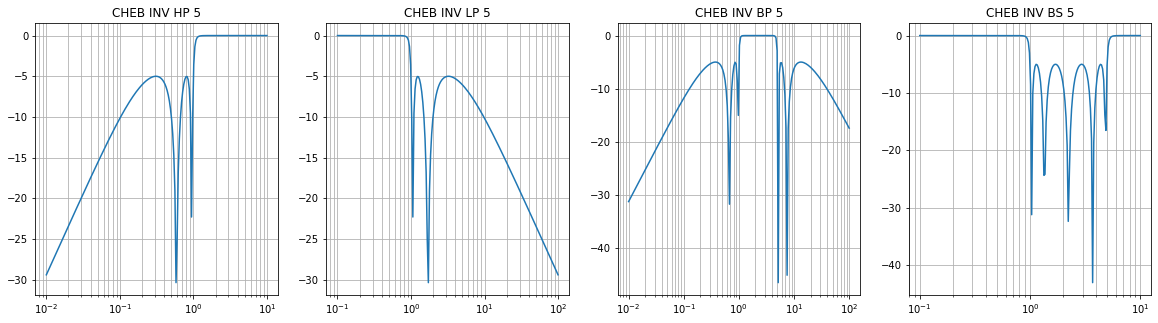

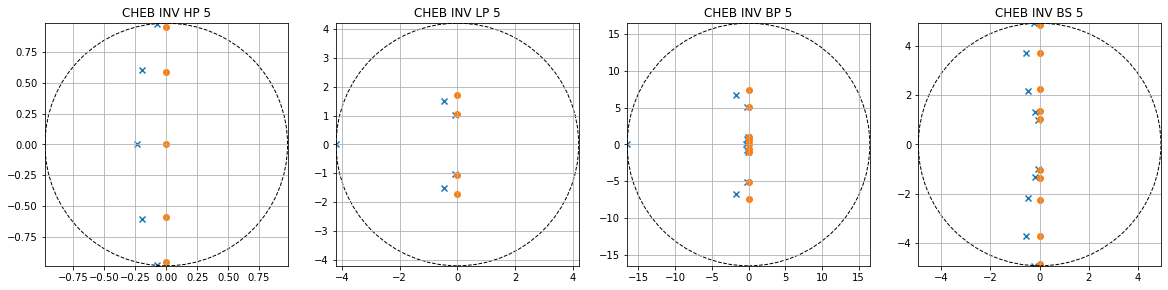

In [4]:
# butterworth
fig, ax = plt.subplots(ncols=4, figsize=(20,5))
figpz, axpz = plt.subplots(ncols=4, figsize=(20,5))

order = 5

b, a = signal.butter(order, 1, 'highpass', analog=True)
title = "BW HP {}".format(order)
plotFilter(ax[0], b, a, title)
simplezplane(axpz[0], b, a, title)

b, a = signal.butter(order, 1, 'lowpass', analog=True)
title = "BW LP {}".format(order)
plotFilter(ax[1], b, a, title)
simplezplane(axpz[1], b, a, title)

b, a = signal.butter(order, [1, 5], 'bandpass', analog=True)
title = "BW BP {}".format(order)
plotFilter(ax[2], b, a, title)
simplezplane(axpz[2], b, a, title)

b, a = signal.butter(order, [1, 5], 'bandstop', analog=True)
title = "BW BS {}".format(order)
plotFilter(ax[3], b, a, title)
simplezplane(axpz[3], b, a, title)

# chevbyshev
fig, ax = plt.subplots(ncols=4, figsize=(20,5))
figpz, axpz = plt.subplots(ncols=4, figsize=(20,5))

rippledB = 5

b, a = signal.cheby1(order, rippledB, 1, 'highpass', analog=True)
title = "CHEB HP {}".format(order)
plotFilter(ax[0], b, a, title)
simplezplane(axpz[0], b, a, title)

b, a = signal.cheby1(order, rippledB, 1, 'lowpass', analog=True)
title = "CHEB LP {}".format(order)
plotFilter(ax[1], b, a, title)
simplezplane(axpz[1], b, a, title)

b, a = signal.cheby1(order, rippledB, [1, 5], 'bandpass', analog=True)
title = "CHEB BP {}".format(order)
plotFilter(ax[2], b, a, title)
simplezplane(axpz[2], b, a, title)

b, a = signal.cheby1(order, rippledB, [1, 5], 'bandstop', analog=True)
title = "CHEB BS {}".format(order)
plotFilter(ax[3], b, a, title)
simplezplane(axpz[3], b, a, title)

# chevbyshev INVERSE
fig, ax = plt.subplots(ncols=4, figsize=(20,5))
figpz, axpz = plt.subplots(ncols=4, figsize=(20,5))

rippledB = 5

b, a = signal.cheby2(order, rippledB, 1, 'highpass', analog=True)
title = "CHEB INV HP {}".format(order)
plotFilter(ax[0], b, a, title)
simplezplane(axpz[0], b, a, title)

b, a = signal.cheby2(order, rippledB, 1, 'lowpass', analog=True)
title = "CHEB INV LP {}".format(order)
plotFilter(ax[1], b, a, title)
simplezplane(axpz[1], b, a, title)

b, a = signal.cheby2(order, rippledB, [1, 5], 'bandpass', analog=True)
title = "CHEB INV BP {}".format(order)
plotFilter(ax[2], b, a, title)
simplezplane(axpz[2], b, a, title)

b, a = signal.cheby2(order, rippledB, [1, 5], 'bandstop', analog=True)
title = "CHEB INV BS {}".format(order)
plotFilter(ax[3], b, a, title)
simplezplane(axpz[3], b, a, title)

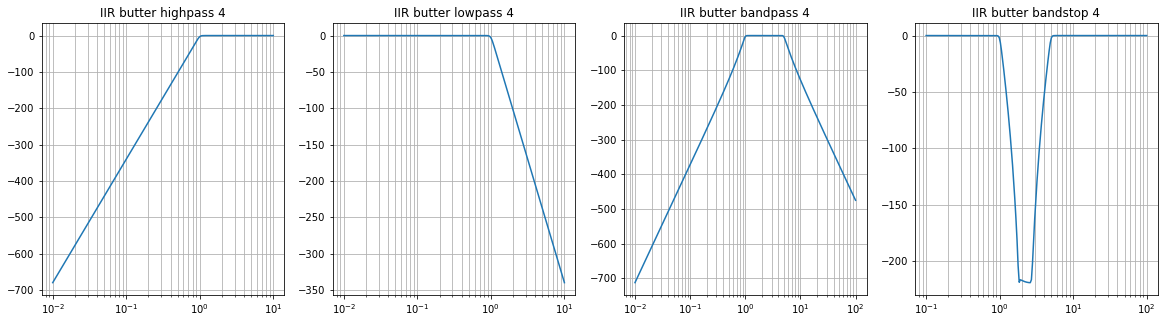

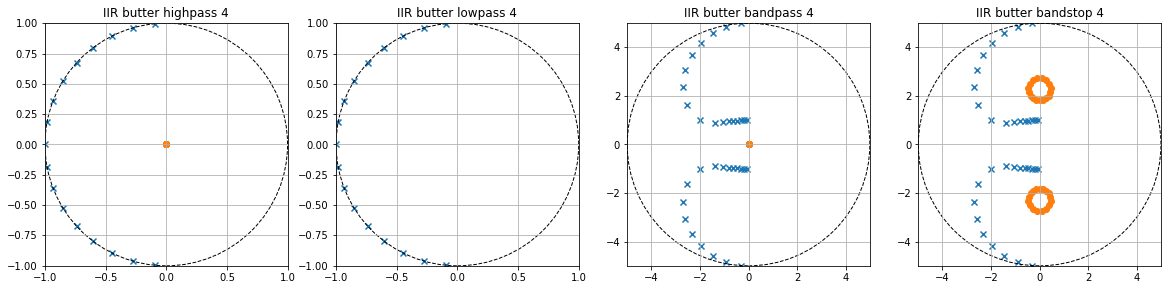

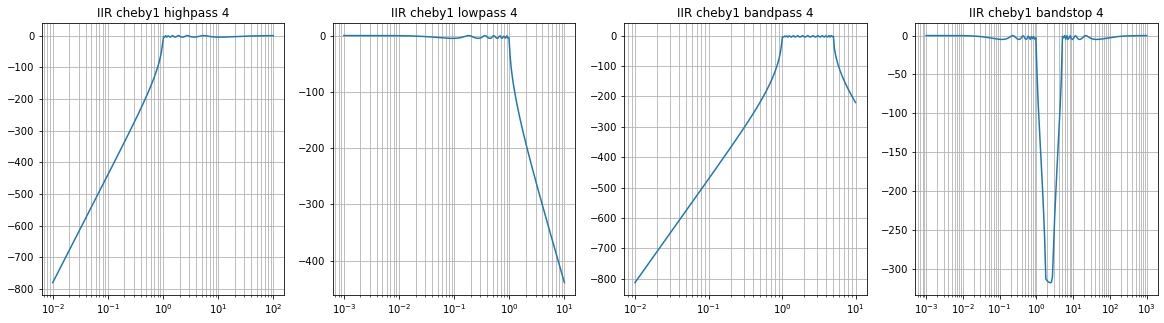

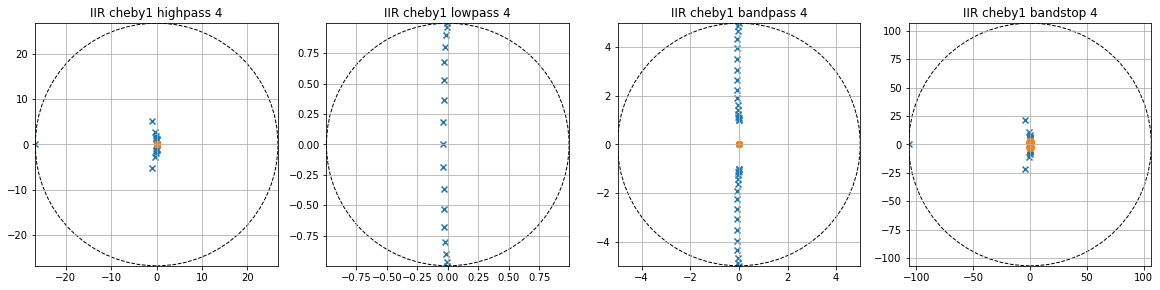

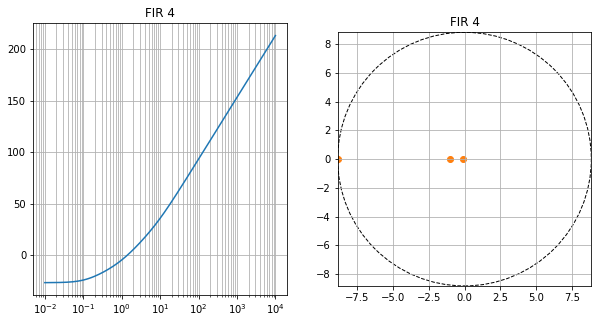

In [21]:

order = 4

for ftype in ["butter", "cheby1"]:
    fig, ax = plt.subplots(ncols=4, figsize=(20,5))
    fig, axpz = plt.subplots(ncols=4, figsize=(20,5))
    for i, btype in enumerate(["highpass", "lowpass", "bandpass", "bandstop"]):
        #display("{} - {}".format(ftype, btype))
        wc = 1
        if btype == "bandpass" or btype == "bandstop":
            wc = [1, 5]
        b, a = signal.iirfilter(17, wc, rp=5, rs=60,
                                btype=btype, analog=True, ftype=ftype)
        title = "IIR {} {} {}".format(ftype, btype, order)
        plotFilter(ax[i], b, a, title)
        simplezplane(axpz[i], b, a, title)
        
fig, ax = plt.subplots(ncols=2, figsize=(10,5))
b = signal.firwin(order, 0.1)
a = [1]
title = "FIR {}".format(order)
plotFilter(ax[0], b, a, title)
simplezplane(ax[1], b, a, title)

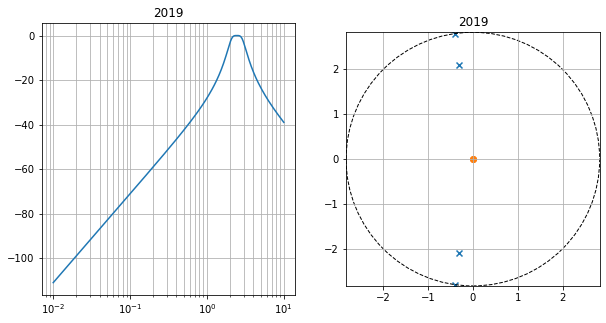

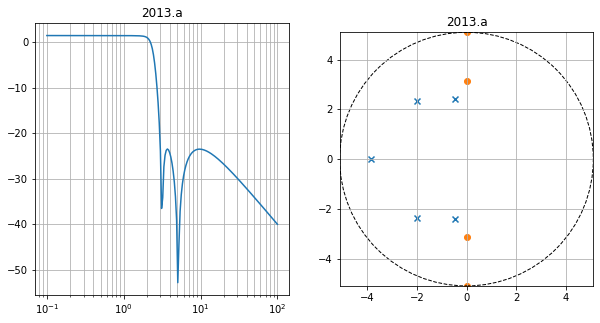

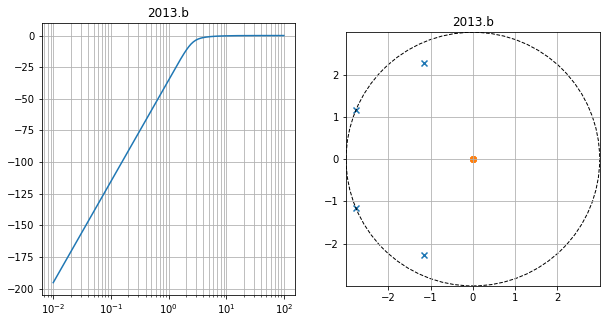

In [6]:
# 2019.A3 (BP Filter)
poles = [
    -0.4+2.8j,
    -0.4-2.8j,
    -0.3-2.10j,
    -0.3+2.10j,
]
zeros = [
    0+0j,
    0-0j,
]

# 2013.A3.a (Inverse Chevbyshev LP filter)
poles2 = [
    -3.86+0j,
    -1.99+2.35j,
    -1.99-2.35j,
    -0.48+2.40j,
    -0.48-2.40j,
]
zeros2 = [
    0+5.10j,
    0-5.10j,
    0+3.15j,
    0-3.15j,
]

# 2013.A3.b (Butterworth HP Filter)
poles3 = [
    -2.77+1.15j,
    -2.77-1.15j,
    -1.15-2.27j,
    -1.15+2.27j,
]
zeros3 = [
    0+0j,
    0+0j,
    0+0j,
    0+0j,
]

def easyPlot(poles, zeros, title):
    b, a = signal.zpk2tf(zeros, poles, 1)
    fig, ax = plt.subplots(ncols=2, figsize=(10,5))
    plotFilter(ax[0], b, a, title)
    simplezplane(ax[1], b, a, title)
easyPlot(poles,zeros, "2019")
easyPlot(poles2,zeros2, "2013.a")
easyPlot(poles3,zeros3, "2013.b")

[0.1061032953945969,
 0,
 -0.3183098861837907,
 0.5,
 -0.3183098861837907,
 0,
 0.1061032953945969]

[1]

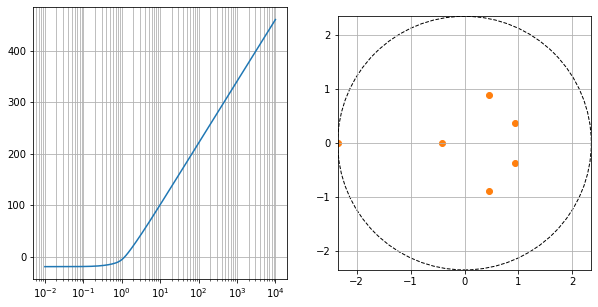

In [5]:
fig, ax = plt.subplots(ncols=2, figsize=(10,5))
b = [1/(3*math.pi), 0, -1/math.pi, 0.5, -1/math.pi, 0, 1/(3*math.pi)]
a = [1]
display(b,a)
title = ""

simplezplane(ax[1], b, a, title)
plotFilter(ax[0], b, a, title)

array([1.00000000e-02, 1.04737090e-02, 1.09698580e-02, 1.14895100e-02,
       1.20337784e-02, 1.26038293e-02, 1.32008840e-02, 1.38262217e-02,
       1.44811823e-02, 1.51671689e-02, 1.58856513e-02, 1.66381689e-02,
       1.74263339e-02, 1.82518349e-02, 1.91164408e-02, 2.00220037e-02,
       2.09704640e-02, 2.19638537e-02, 2.30043012e-02, 2.40940356e-02,
       2.52353917e-02, 2.64308149e-02, 2.76828663e-02, 2.89942285e-02,
       3.03677112e-02, 3.18062569e-02, 3.33129479e-02, 3.48910121e-02,
       3.65438307e-02, 3.82749448e-02, 4.00880633e-02, 4.19870708e-02,
       4.39760361e-02, 4.60592204e-02, 4.82410870e-02, 5.05263107e-02,
       5.29197874e-02, 5.54266452e-02, 5.80522552e-02, 6.08022426e-02,
       6.36824994e-02, 6.66991966e-02, 6.98587975e-02, 7.31680714e-02,
       7.66341087e-02, 8.02643352e-02, 8.40665289e-02, 8.80488358e-02,
       9.22197882e-02, 9.65883224e-02, 1.01163798e-01, 1.05956018e-01,
       1.10975250e-01, 1.16232247e-01, 1.21738273e-01, 1.27505124e-01,
      

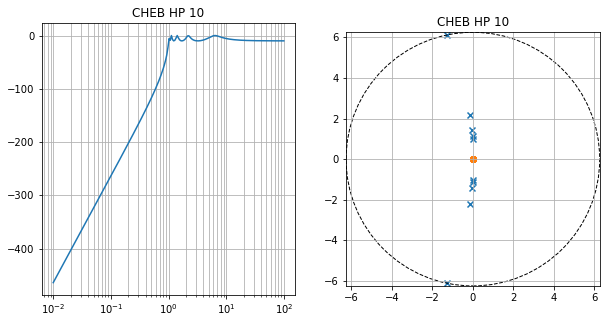

In [12]:
# pla
def plotFilterTest(ax, b, a, title):
    w, h = signal.freqs(b, a)
    display(w)
    ax.plot(w, 20 * np.log10(abs(h)))
    ax.set_xscale('log')
    ax.set_title(title)
    ax.grid(which='both', axis='both')

order = 10
rippledB = 10
b, a = signal.cheby1(order, rippledB, 1, 'highpass', analog=True)
title = "CHEB HP {}".format(order)
fig, ax = plt.subplots(ncols=2, figsize=(10,5))
plotFilterTest(ax[0], b, a, title)
simplezplane(ax[1], b, a, title)